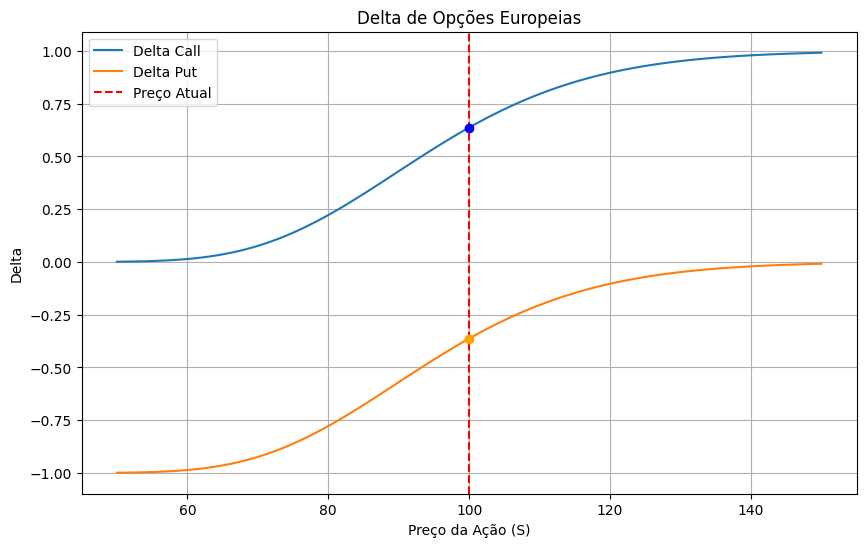

Delta Call em S=100.00: 0.6368
Delta Put em S=100.00: -0.3632


FloatSlider(value=100.0, description='Preço da Ação (S)', max=150.0, min=50.0, step=1.0)

FloatSlider(value=100.0, description='Preço de Exercício (K)', max=150.0, min=50.0, step=1.0)

FloatSlider(value=1.0, description='Tempo até Vencimento (T)', max=2.0, min=0.1)

FloatSlider(value=0.2, description='Volatilidade (σ)', max=0.5, min=0.1, step=0.01)

FloatSlider(value=0.05, description='Taxa Livre de Risco (r)', max=0.1, min=0.01, step=0.01)

Output()

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display, clear_output

# Funções do modelo Black-Scholes
def d1(S, K, T, r, sigma):
    return (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))

def call_delta(S, K, T, r, sigma):
    return norm.cdf(d1(S, K, T, r, sigma))

def put_delta(S, K, T, r, sigma):
    return call_delta(S, K, T, r, sigma) - 1

# Componentes interativos
S_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Preço da Ação (S)')
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Preço de Exercício (K)')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Tempo até Vencimento (T)')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.01, description='Volatilidade (σ)')
r_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01, description='Taxa Livre de Risco (r)')

output = widgets.Output()

# Função de atualização
def update_plot(S, K, T, r, sigma):
    S_range = np.linspace(50, 150, 100)
    call_deltas = [call_delta(s, K, T, r, sigma) for s in S_range]
    put_deltas = [put_delta(s, K, T, r, sigma) for s in S_range]
    
    current_call = call_delta(S, K, T, r, sigma)
    current_put = put_delta(S, K, T, r, sigma)
    
    plt.figure(figsize=(10, 6))
    plt.plot(S_range, call_deltas, label='Delta Call')
    plt.plot(S_range, put_deltas, label='Delta Put')
    plt.axvline(x=S, color='red', linestyle='--', label='Preço Atual')
    plt.scatter(S, current_call, color='blue', zorder=5)
    plt.scatter(S, current_put, color='orange', zorder=5)
    plt.xlabel('Preço da Ação (S)')
    plt.ylabel('Delta')
    plt.title('Delta de Opções Europeias')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Delta Call em S={S:.2f}: {current_call:.4f}")
    print(f"Delta Put em S={S:.2f}: {current_put:.4f}")

def update_all(change):
    with output:
        clear_output(wait=True)
        update_plot(S_slider.value, K_slider.value, T_slider.value, r_slider.value, sigma_slider.value)

# Conectar widgets à função de atualização
for slider in [S_slider, K_slider, T_slider, sigma_slider, r_slider]:
    slider.observe(update_all, names='value')

# Executar atualização inicial
update_plot(S_slider.value, K_slider.value, T_slider.value, r_slider.value, sigma_slider.value)

# Exibir interface
display(S_slider, K_slider, T_slider, sigma_slider, r_slider)
display(output)